# AIM
In this Project,We're going to predict the price range of each mobile in the dataser based on the mobile specifications as : Battery power, 3G enabled , wifi ,Bluetooth, Ram etc .

# Usage
- This kind of prediction will help companies to  estimate the price of mobiles of an mobile phone based on its specifications.
- Beside that it will help Consumers to verify that they are paying best price according to the specs of the mobile.

# Contents
<ol>
    <li><a href="#About" style = "text-decoration: none;" ><b>About the data.</b></a></li>
    <br>
    <li><a href="#Importing" style = "text-decoration: none;" ><b>Importing the libraries and the data.</b></a></li>
    <br>
    <li><a href="#Understand" style = "text-decoration: none;" ><b>Understanding the data.</b></a></li>
    <br>
    <li><a href="#Analysis" style = "text-decoration: none;" ><b>Data analysis and visualization.</b></a></li>
    <br>  
    <ol>
      <li><a href="#Ram" style = "text-decoration: none;" >How does ram is affected by price ?</a></li>
      <br>
      <li><a href="#Internal_memory" style = "text-decoration: none;" >What is the relation between Internal Memory and Price Range ?</a></li>
      <br>
      <li><a href="#weight" style = "text-decoration: none;" >What is the relation between Phone weight and it's price ?</a></li>
      <br>
      <li><a href="#thickness" style = "text-decoration: none;" >What is the relation between Phone thickness and it's price ?</a></li>
      <br>
      <li><a href="#Battery" style = "text-decoration: none;" >What is the relation between Battery power and Price Range ?</a></li>
      <br>
      <li><a href="#Primary_Camera" style = "text-decoration: none;" >What is the relation between primary camera resolution and the phone price?</a></li>
      <br>
      <li><a href="#Front_Camera" style = "text-decoration: none;" >What is the relation between Front camera resolution and the phone price?</a></li>
      <br>
    </ol>
    <li><a href="#Preprocessing" style = "text-decoration: none;" ><b>Preprocessing the data.</b></a></li>
    <br> 
    <li><a href="#Modelling" style = "text-decoration: none;" ><b>developing the machine learning models</b></a></li>
    <br> 
    <li><a href="#Conclusion" style = "text-decoration: none;" ><b>Conclusion</b></a></li>
    <br>
</ol>

    

# About the data <a name = "About"></a>

Imagine if you founded your own mobile business. There are numerous large corporations in front of you.
You don't have a solid understanding of how to mark a price produced by your business. Since you are knowledgeable with ML and DL, you started looking for datasets relating to mobile sales for different companies and were able to locate a small dataset in the area.
You must now create a machine learning model to forecast the retail pricing for the mobile devices made by your business.
- Product_id: ID of each cellphone.
- Price: Price of each cellphone.
- Sale: Sales number.
- weight: Weight of each cellphone.
- resoloution: Resoloution of each cellphone.
- ppi: Phone Pixel Density.
- cpu core: type of CPU core in each cellphone.
- cpu freq: CPU Frequency in each cellphone.
- internal mem: Internal memory of each cellphone.
- ram: RAM of each cellphone.
- RearCam: Resolution of the primary camera of each phone in pixels.
- Front_Cam: Resolution of the front camera of each phone in pixels.
- battery: Capacity of the battery of each phone in mAh.
- thickness: Thickness of each phone in mm.


# Importing the libraries and the data <a name = "Importing"></a>

In [1]:
# Main Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error,r2_score

# Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector

%matplotlib inline

In [2]:
df = pd.read_csv("Cellphone.csv")

# Understanding the data <a name = "Understand"></a>

In [3]:
# getting first 5 rows of the data
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
# getting last 5 rows of the data
df.tail()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.0,12.0,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.0,20.0,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.0,20.0,8.0,3400,7.9
160,1131,2536,9807,202.0,6.00,367,8,1.500,16.0,3.0,21.5,16.0,2700,8.4


In [5]:
# getting the size of the data
print(df.shape)

(161, 14)


In [6]:
# understanding the basic information about the data 
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [7]:
# getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [8]:
# check if there any missing values
print(df.isna().sum())

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64


As we can see there is no null values in this dataset.

# Data analysis and visualization <a name = "Analysis"></a>

<h2 align = "center" style="color:red">1. How does ram affect the price ?</h2> <a name="Ram"></a>

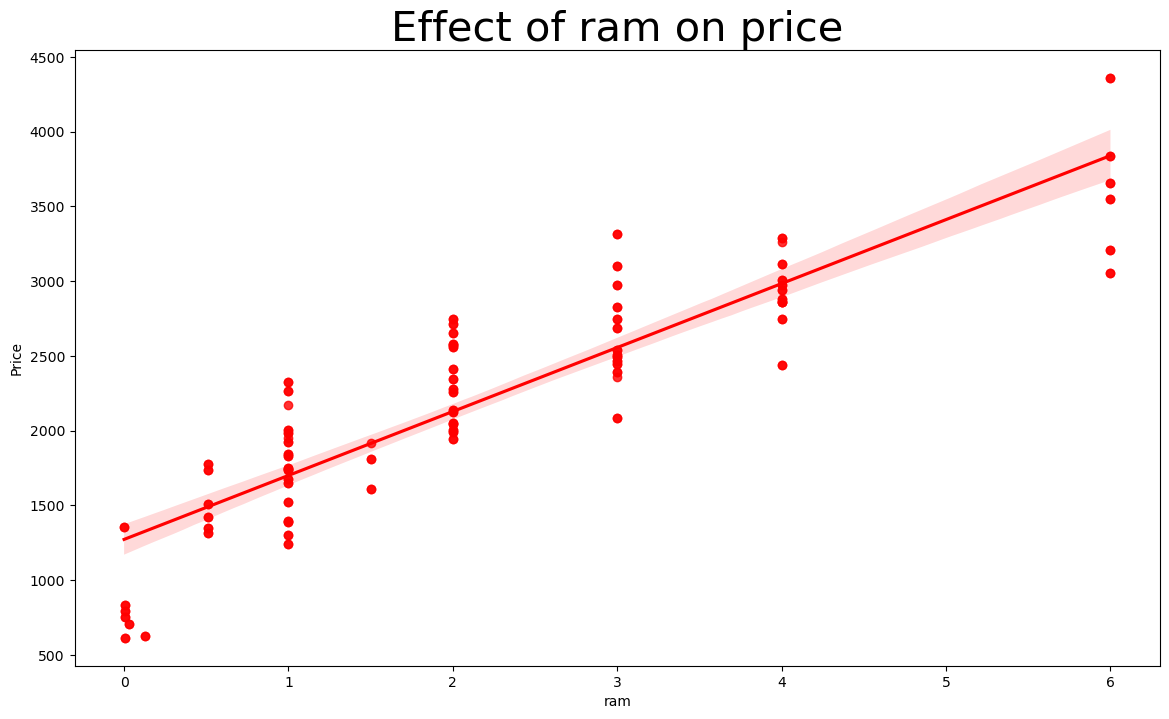

In [9]:
plt.figure(figsize = (14,8));
sns.regplot(x = 'ram' , y = 'Price' , data = df , color = 'red');
plt.title('Effect of ram on price', fontsize = 30)
plt.show();

<h2 align = "center" style="color:red">2. What is the relation between Internal Memory and Price Range ?</h2> <a name="Internal_memory"></a>

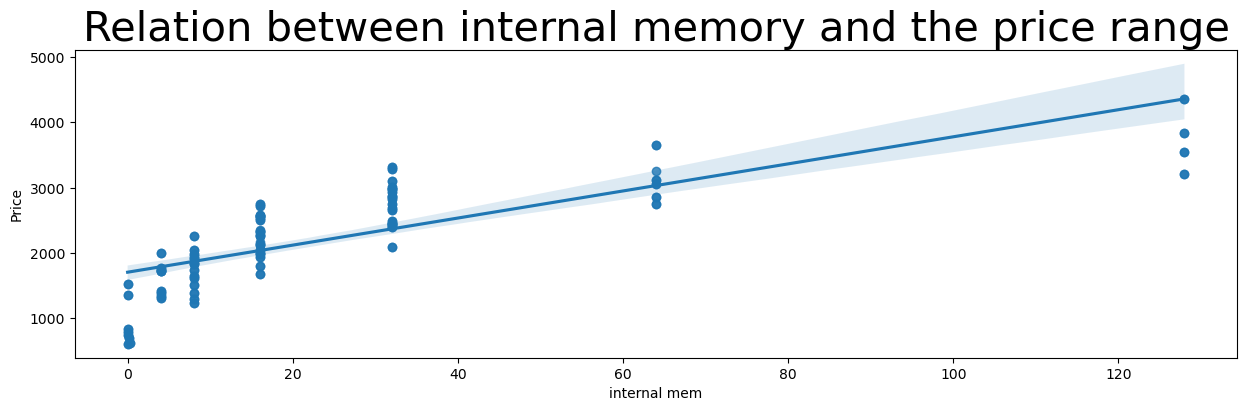

In [10]:
plt.figure(figsize = (15,4))
sns.regplot(x = 'internal mem' , y = 'Price' , data = df );
plt.title("Relation between internal memory and the price range", fontsize = 30);
plt.show();

<h2 align = "center" style="color:red">3. What is the relation between Phone weight and it's price ?</h2> <a name="weight"></a>

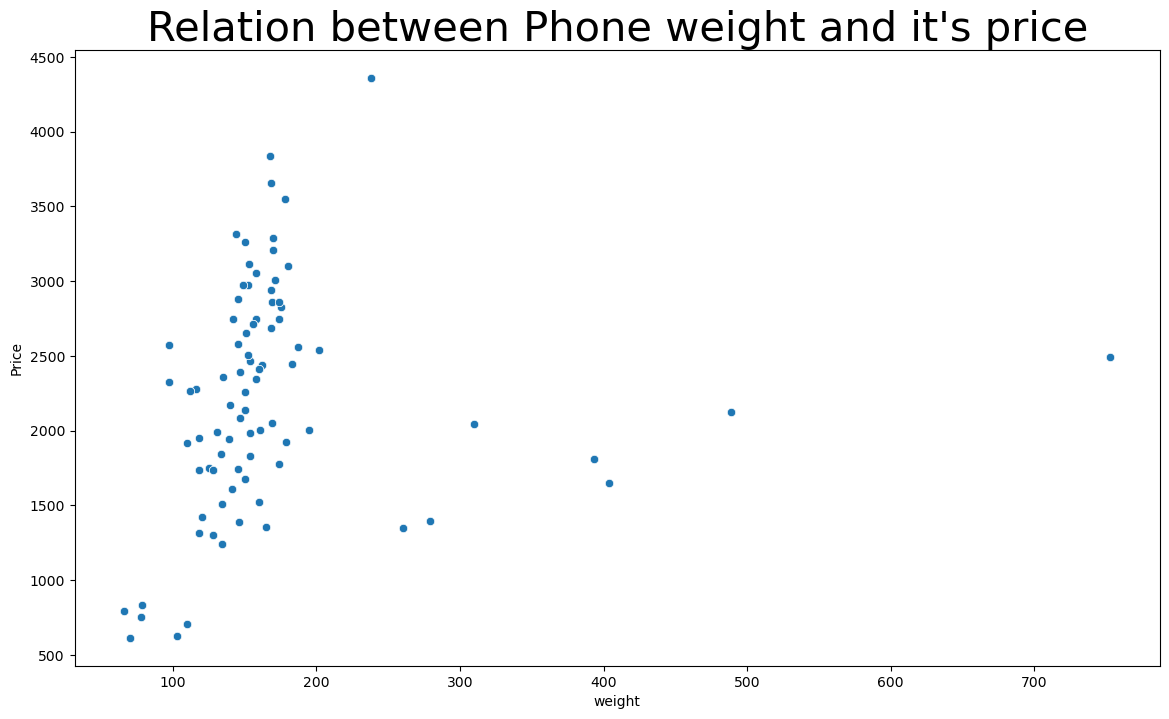

In [11]:
plt.figure(figsize = (14,8));
sns.scatterplot(x = 'weight' , y = 'Price' , data = df );
plt.title("Relation between Phone weight and it's price", fontsize = 30);
plt.show();

<h2 align = "center" style="color:red">4. What is the relation between Phone thickness and it's price ?</h2> <a name="thickness"></a>

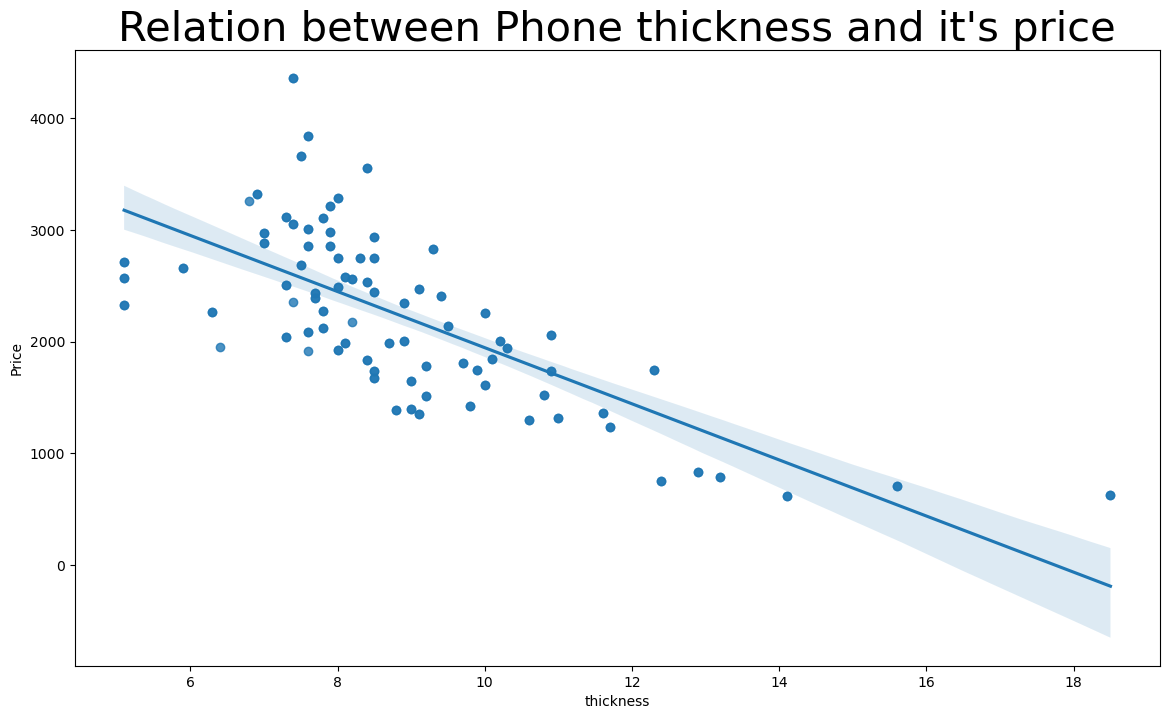

In [12]:
plt.figure(figsize = (14,8));
sns.regplot(x = 'thickness' , y = 'Price' , data = df );
plt.title("Relation between Phone thickness and it's price", fontsize = 30);
plt.show();

<h2 align = "center" style="color:red">5. What is the relation between Battery power and Price Range ?</h2> <a name="Battery"></a>

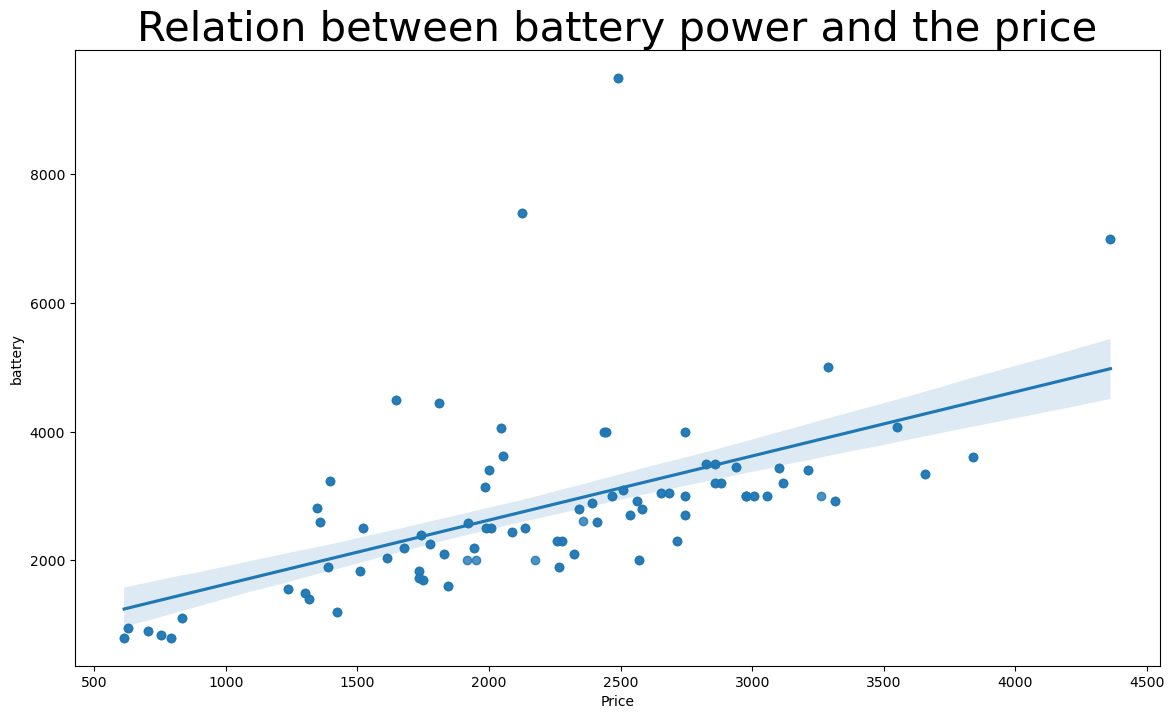

In [13]:
plt.figure(figsize = (14,8));
sns.regplot(x = 'Price' , y = 'battery' , data = df );
plt.title("Relation between battery power and the price", fontsize = 30);
plt.show();

<h2 align = "center" style="color:red">6. What is the relation between primary camera resolution and the phone price ?</h2> <a name="Primary_camera"></a>

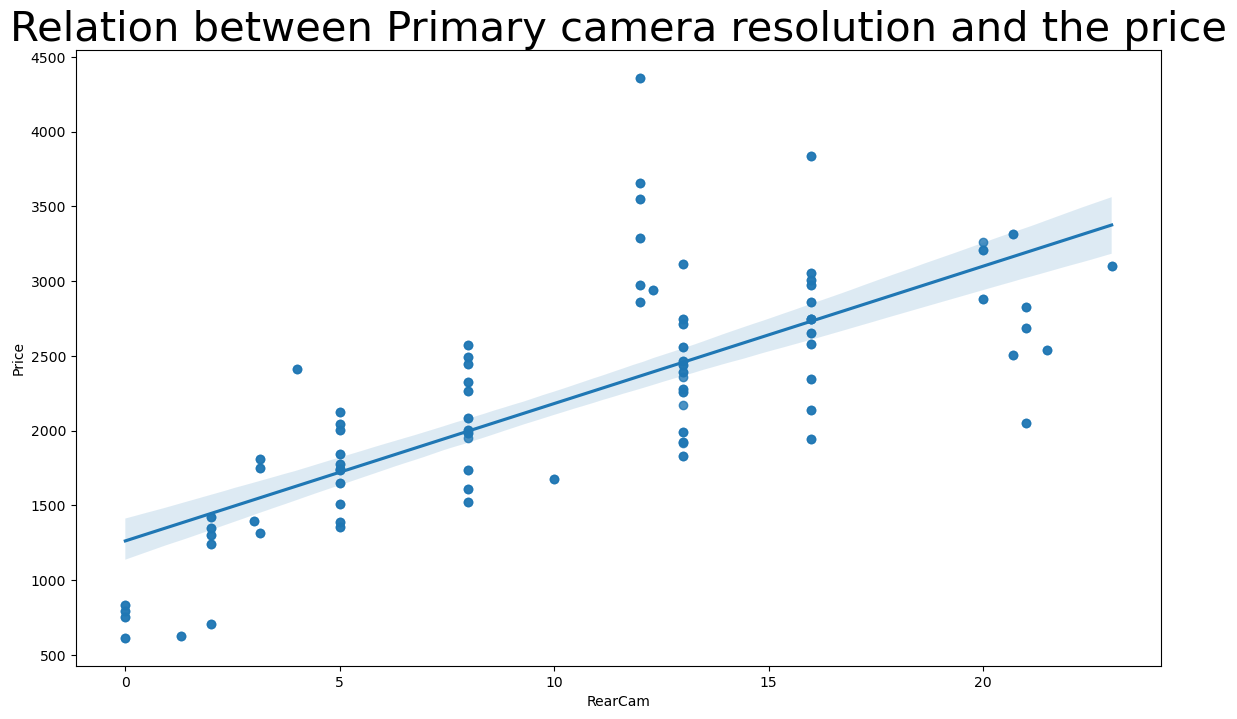

In [14]:
plt.figure(figsize = (14,8));
sns.regplot(x = 'RearCam' , y = 'Price' , data = df );
plt.title("Relation between Primary camera resolution and the price", fontsize = 30);
plt.show();

<h2 align = "center" style="color:red">7. What is the relation between Front camera resolution and the phone price ?</h2> <a name="Front_camera"></a>

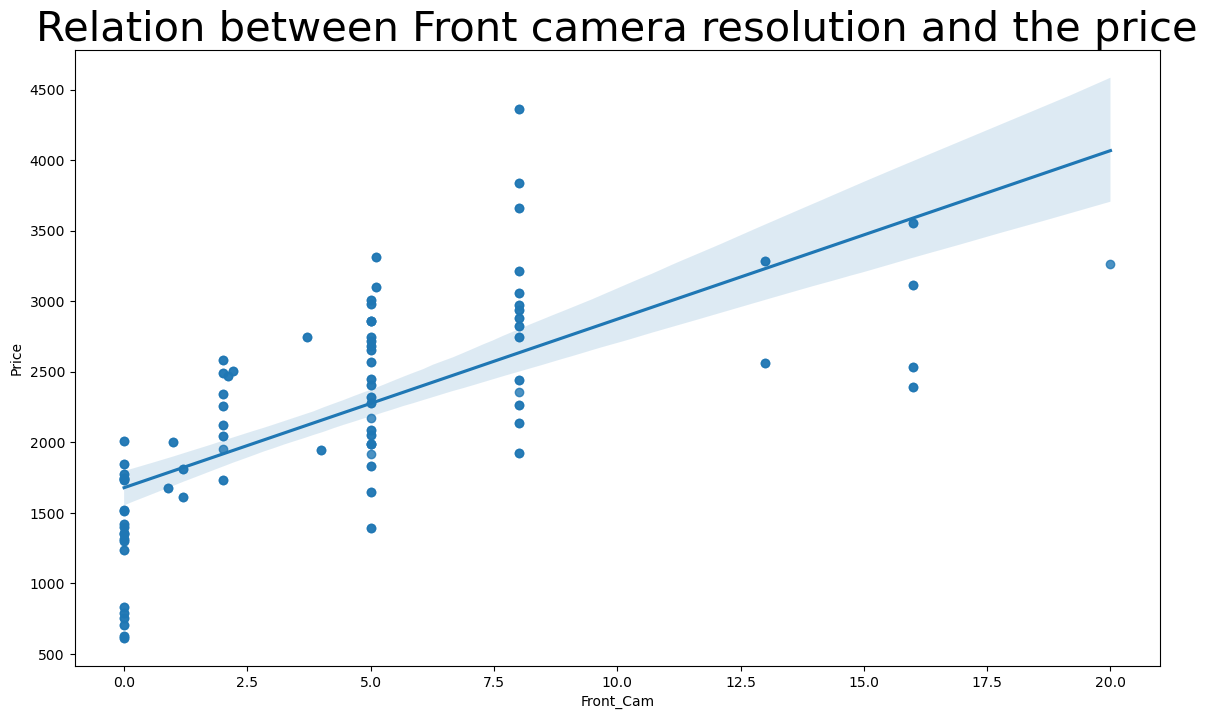

In [15]:
plt.figure(figsize = (14,8));
sns.regplot(x = 'Front_Cam' , y = 'Price' , data = df );
plt.title("Relation between Front camera resolution and the price", fontsize = 30);
plt.show();

# Data Preprocessing <a name = "Preprocessing"></a>

In [16]:
# showing all columns when calling df.head()
pd.set_option('display.max_columns', None)

In [17]:
features = df.drop([ 'Price'], axis = 1)
target = df['Price']

In [18]:
# TRAIN TEST SPLIT
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size = 0.1, random_state = 101)

In [19]:
# STANDARD SCALER
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

# Modelling <a name = "Modelling"></a>

### Bench mark model

#### Linear regression <a name = 'Lr_R'></a>

In [20]:
# LINEAR MODEL FIT AND PREDICT
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.907361297930164
RMSE is: 212.23552495606359


In [21]:
# TRUE PERFORMANCE OF THE MODEL ON UNSEEN DATA
print("r2_score_cross_val:",np.mean(cross_val_score(lr,X_train,y_train, scoring = "r2", cv = 5)))

r2_score_cross_val: 0.9395305808239302


### My model

#### Feature selection

In [22]:
backward_feature_selector = SequentialFeatureSelector(LinearRegression(positive=False,n_jobs = -1),
                                                      k_features = (1,13),
                                                      forward = False,floating=False,
                                                      scoring = "r2",
                                                      cv = 5,
                                                      verbose = 0).fit(X_train, y_train)

In [23]:
backward_feature_selector.k_feature_idx_

(2, 3, 4, 5, 6, 7, 8, 10, 11, 12)

In [24]:
backward_feature_selector.k_score_

0.9422363348937441

#### Model after feature selection

In [25]:
X_train = X_train[:, [2, 3, 4, 5, 6, 7, 8, 10, 11, 12]]
X_test = X_test[:, [2, 3, 4, 5, 6, 7, 8, 10, 11, 12]]

#### Linear regression

In [26]:
lr = LinearRegression(positive=False)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9015589833303299
RMSE is: 218.78114665093406


#### Lasso regression

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.901472643244048
RMSE is: 218.8770692838009


#### Ridge regression

In [28]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9016270263020543
RMSE is: 218.7055222152084


#### Elastic net

In [29]:
elastic = ElasticNet(alpha=0.1)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)

# EVALUATION METRICS
print(f"r2_score is: {r2_score(y_test,y_pred)}")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score is: 0.9034058092262509
RMSE is: 216.7191822349171


# Conclusion <a name = "Conclusion"></a>

In [30]:
models_scores = {'models': ['Linear Regression', 'Lasso regression', 'Ridge regression', 'Elastic Net'],
                 'r2_scores': [0.9015, 0.9014, 0.9016, 0.9034],
                 'Root mean squared error': [218.78, 218.87, 218.70, 216.71]}
models_scores = pd.DataFrame(models_scores)
models_scores.head()

,models,r2_scores,Root mean squared error
0,Linear Regression,0.9015,218.78
1,Lasso regression,0.9014,218.87
2,Ridge regression,0.9016,218.70
3,Elastic Net,0.9034,216.71


Elastic Net model outperforms other models in the mobile price regression problem with:
- 0.9034 r2_score
- 216.71 Root mean squared error

In [31]:
y_pred = elastic.predict(X_test)

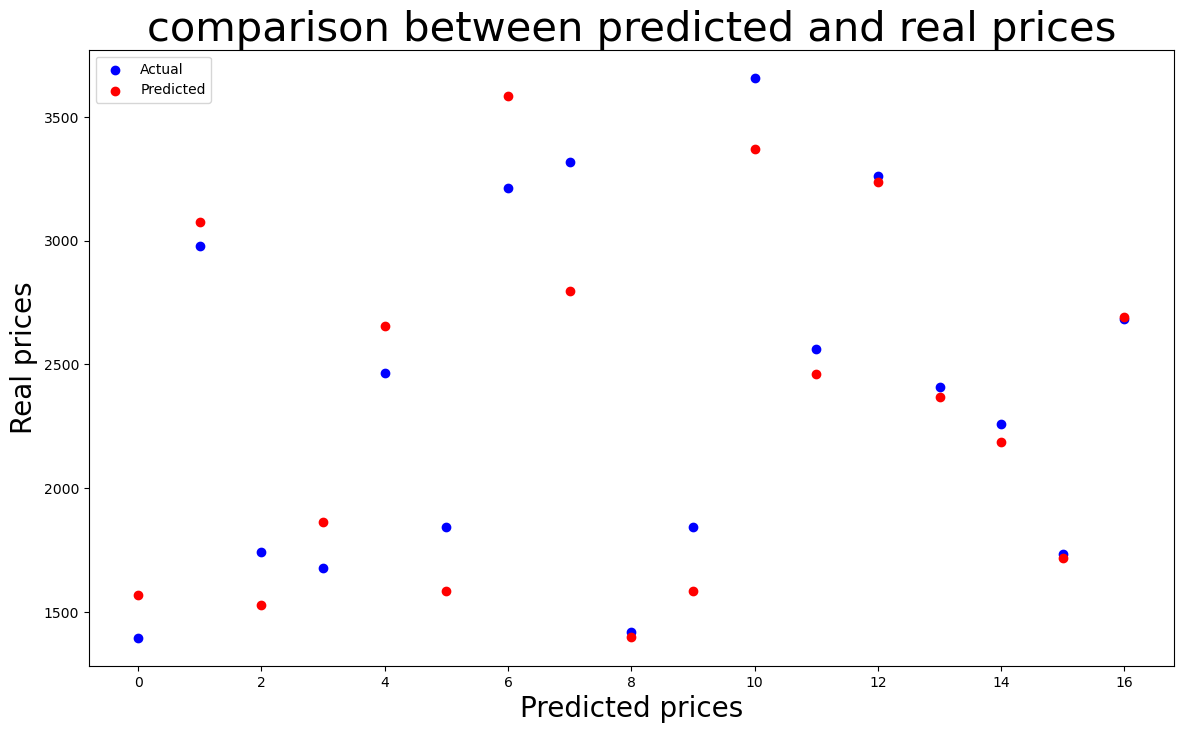

In [32]:
# scatter plot

plt.figure(figsize = (14,8))
plt.scatter(range(len(y_test)), y_test, color='blue');
plt.scatter(range(len(y_pred)), y_pred, color='red');
plt.xlabel('Predicted prices', fontsize = 20);
plt.ylabel('Real prices', fontsize = 20);
plt.title('comparison between predicted and real prices', fontsize = 30)
plt.legend(labels = ('Actual','Predicted'),loc='upper left');
plt.show();